In [1]:
import warnings   
warnings.simplefilter("ignore") 
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab
%matplotlib notebook

import calour as cl
import numpy as np
import pandas as pd

from scipy.stats import sem
import pickle

## CFS data 

In [2]:
with open("../results_all/cfs_filtering_updated_B1k.pkl", "rb") as f:
    filtlev, sig_bh_cfs, sig_ds_cfs, sig_fbh_cfs, err_ds_cfs, err_bh_cfs, err_fbh_cfs = pickle.load(f)

In [3]:
print(max(err_ds_cfs))

0.311575280077


<IPython.core.display.Javascript object>


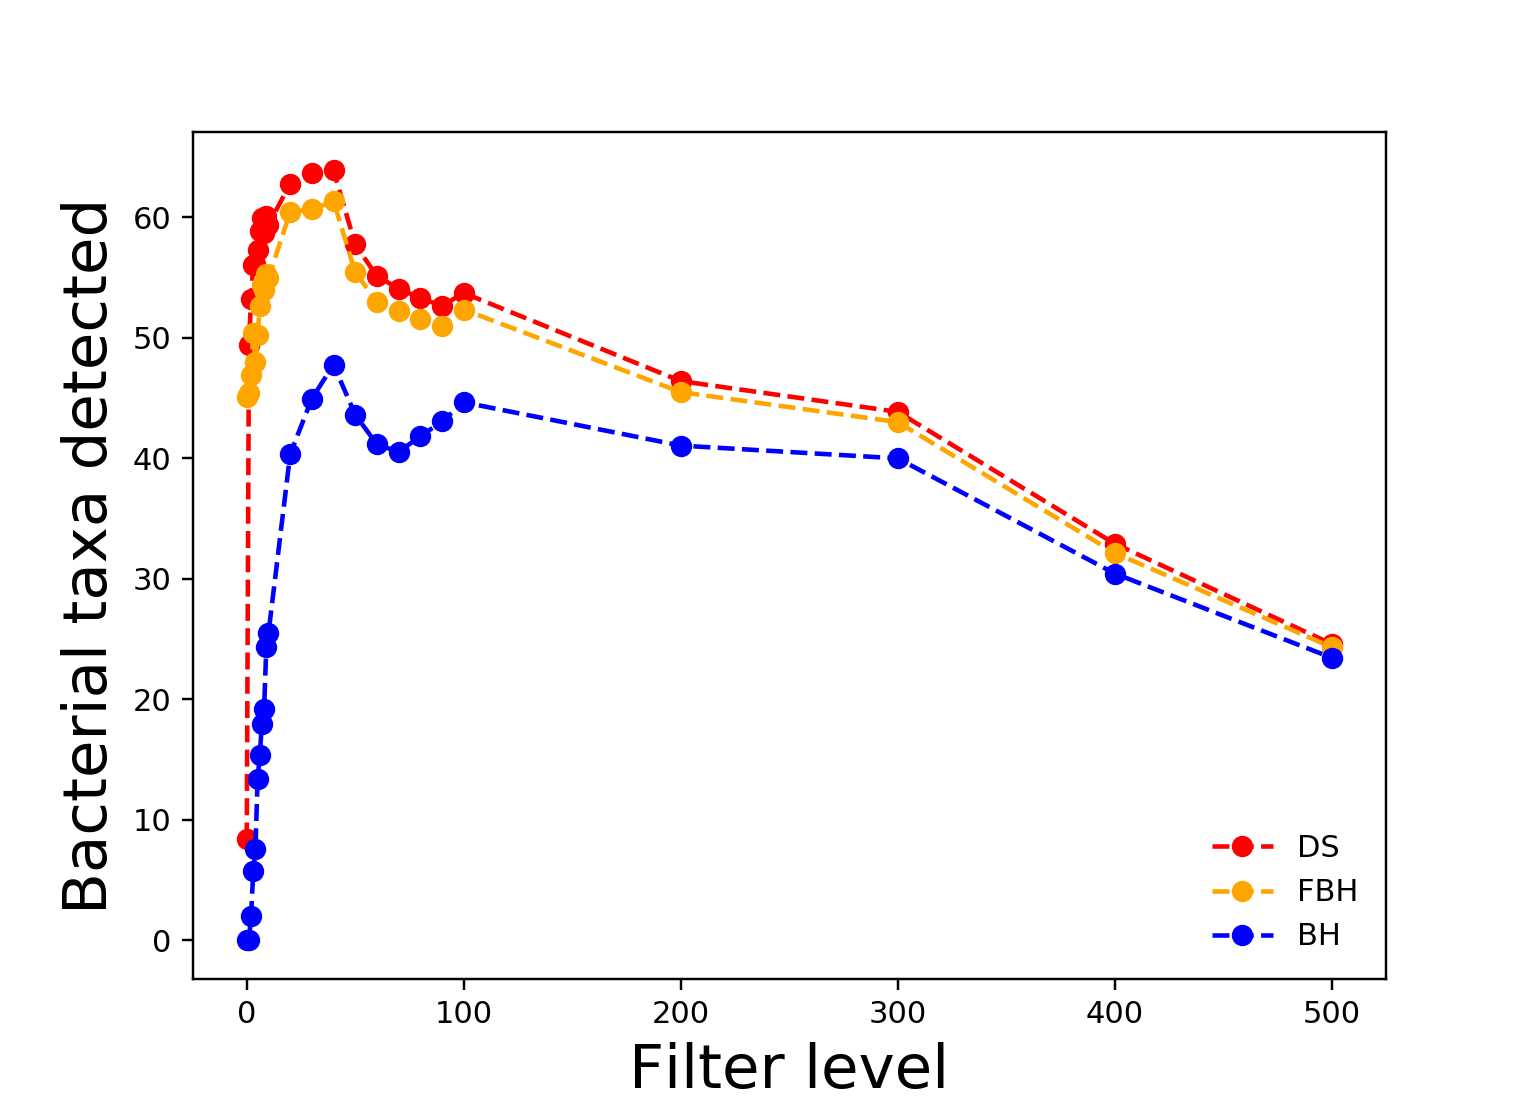

In [4]:
fl_cfs = plt.figure(figsize=(7, 5))
plt.plot(filtlev, sig_ds_cfs, linestyle='--', marker='o', color = 'red', label = 'DS')
plt.plot(filtlev, sig_fbh_cfs, linestyle='--', marker='o', color = 'orange', label = 'FBH')
plt.plot(filtlev, sig_bh_cfs, linestyle='--', marker='o', color = 'blue', label = 'BH')
pylab.legend(loc ='lower right', frameon=False)
plt.xlabel('Filter level', fontsize = 20)
plt.ylabel('Bacterial taxa detected', fontsize = 20)
fl_cfs.savefig('../figures/fl_cfs.pdf', dpi=300)

<IPython.core.display.Javascript object>


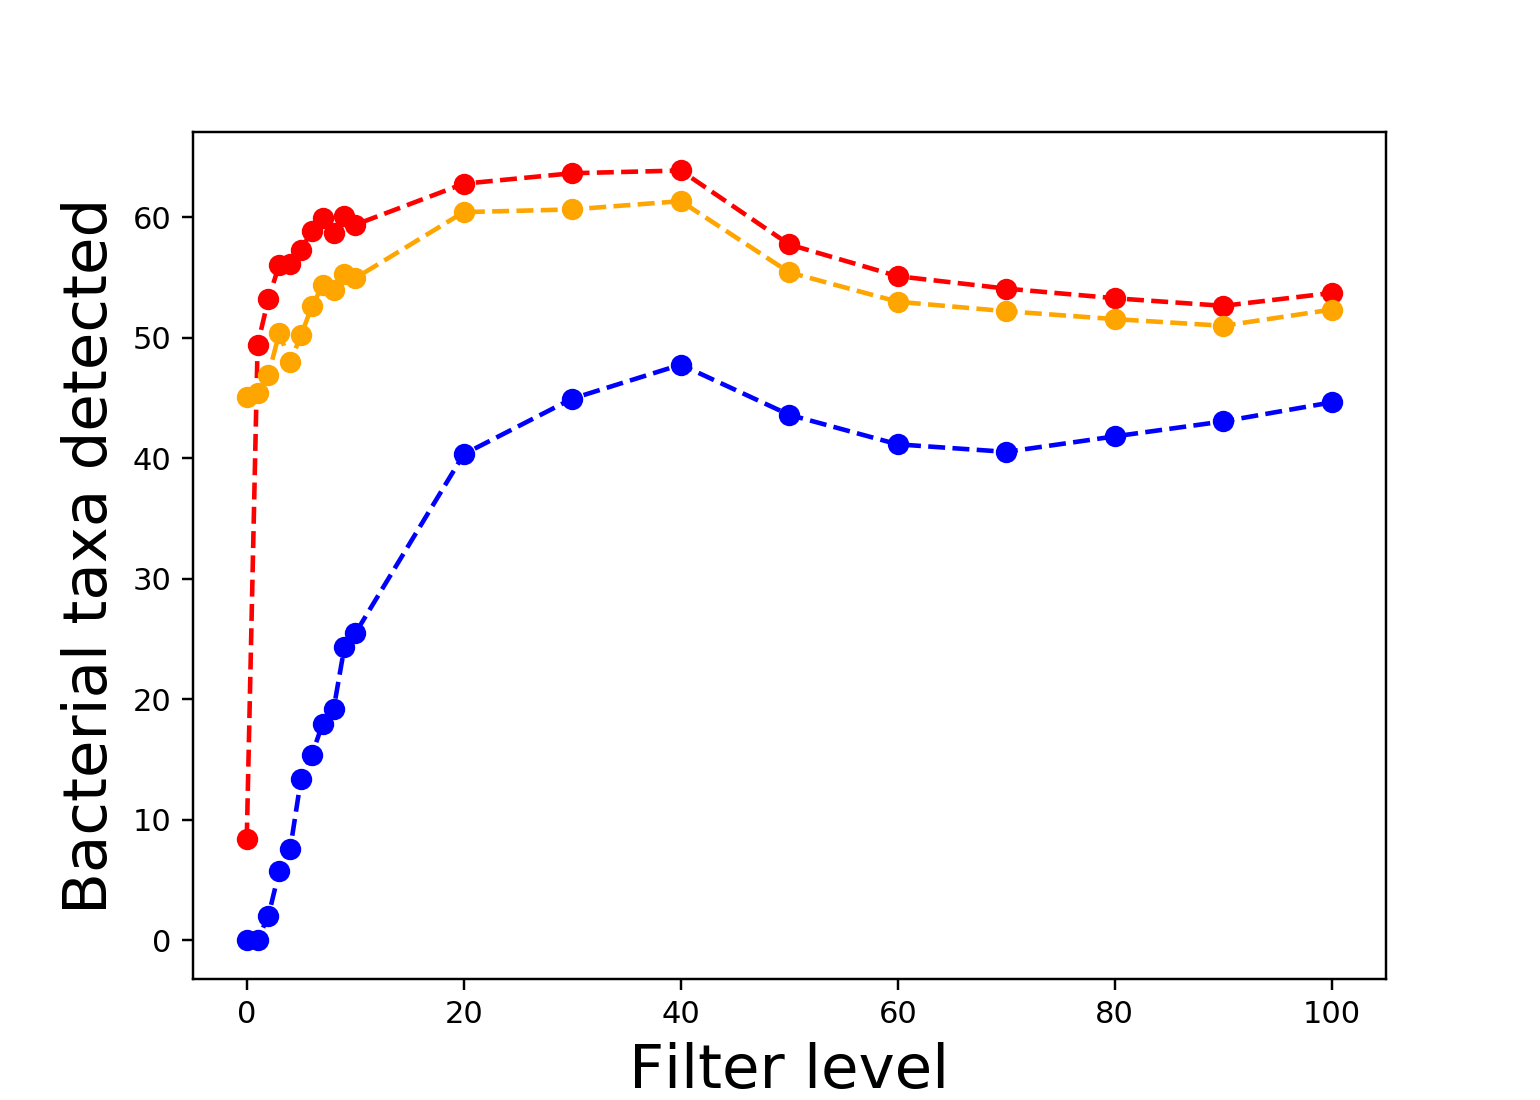

In [5]:
fl_cfs_zoom = plt.figure(figsize=(7,5))
plt.plot(filtlev[0:20], sig_ds_cfs[0:20], linestyle='--', marker='o', color = 'red', label = 'DS')
plt.plot(filtlev[0:20], sig_bh_cfs[0:20], linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(filtlev[0:20], sig_fbh_cfs[0:20], linestyle='--', marker='o', color = 'orange', label = 'FBH')

plt.xlabel('Filter level', fontsize = 20)
plt.ylabel('Bacterial taxa detected', fontsize = 20)
fl_cfs_zoom.savefig('../figures/fl_cfs_zoom.pdf', dpi=300)

In [6]:
# heatmap
cfs = cl.read_amplicon('../../data/cfs.biom','../../data/cfs.map.txt', sparse=False, normalize=10000, min_reads=1000)
cfs_sub1 = cfs.filter_min_abundance(5)

# apply FDR methods to intersted categories
ds1_cfs = cfs_sub1.diff_abundance('Subject','Control','Patient', fdr_method='dsfdr', numperm=1000)
bh1_cfs = cfs_sub1.diff_abundance('Subject','Control','Patient', fdr_method='bhfdr', numperm=1000)
fbh1_cfs = cfs_sub1.diff_abundance('Subject','Control','Patient', fdr_method='filterBH', numperm=1000)

# shown only subjects in 'Control' and 'Patient' groups
ds2_cfs = ds1_cfs.filter_samples('Subject',['Control','Patient'])
bh2_cfs = bh1_cfs.filter_samples('Subject',['Control','Patient'])
fbh2_cfs = fbh1_cfs.filter_samples('Subject',['Control','Patient'])

2017-10-14 22:33:52 WARNING These have metadata but do not have data - dropped: {'ERR1331814'}


<IPython.core.display.Javascript object>


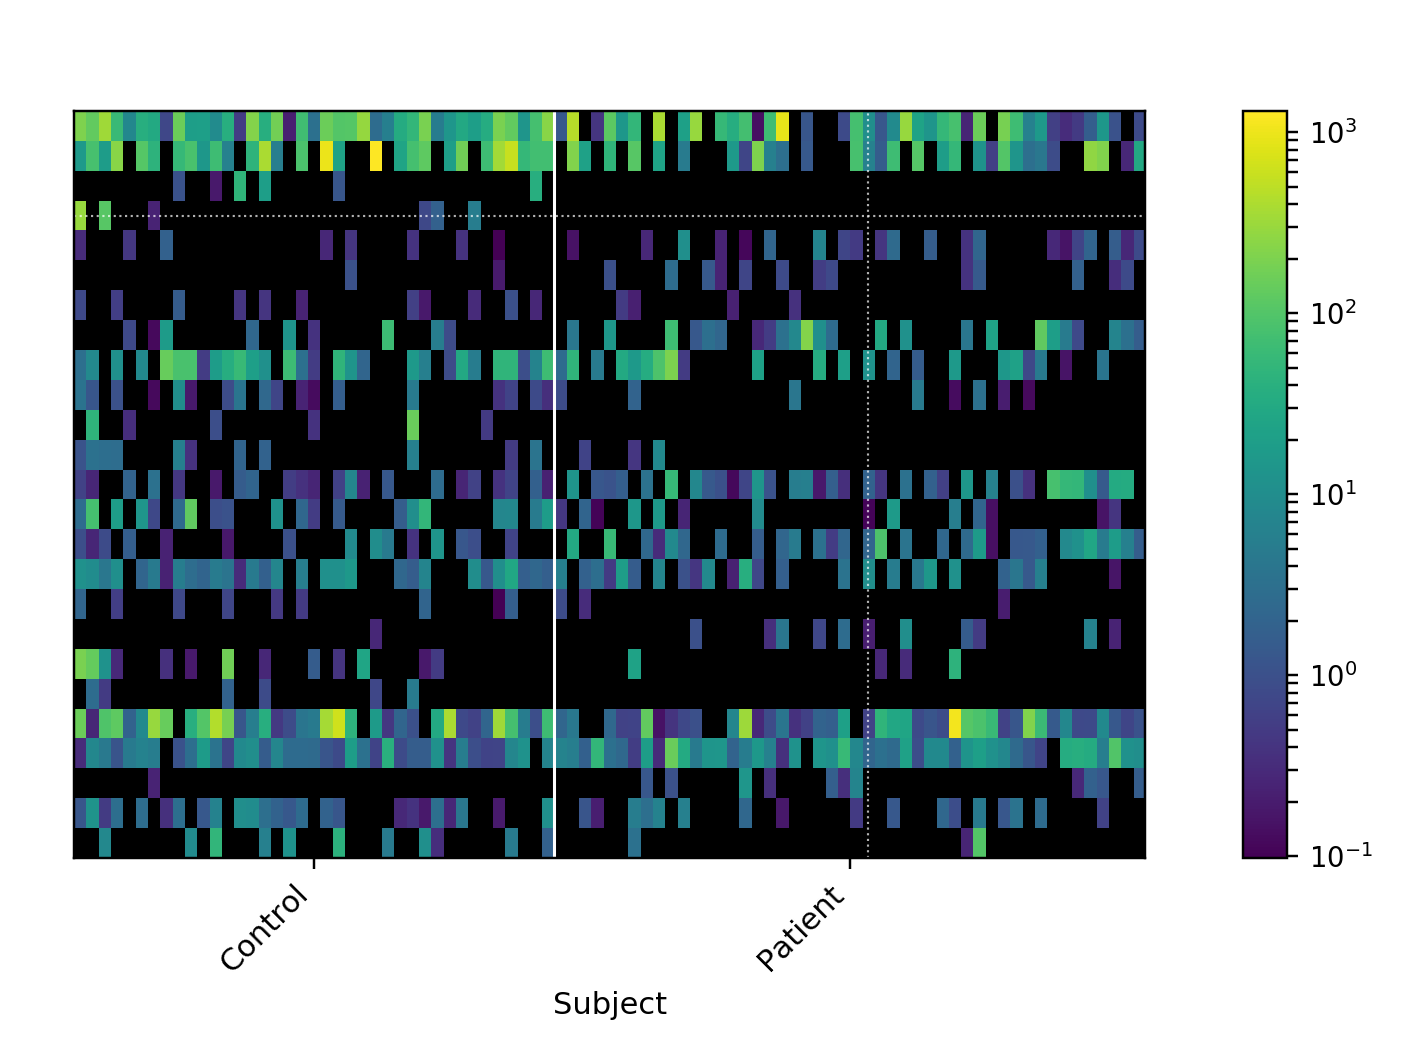

Label(value='0 features are selected')

HBox(children=(Text(value='-', description='Sample ID', layout=Layout(width='100%'), placeholder='Sample ID'), Text(value='-', description='Feature ID', layout=Layout(width='100%'), placeholder='Feature ID'), FloatText(value=0.0, description='Abundance', layout=Layout(width='100%'))))

HBox(children=(Dropdown(layout=Layout(width='20%'), options=('Sample_Name_s', 'BarcodeSequence', 'LinkerPrimerSequence', 'Subject', 'Sex', 'Age', 'Pittsburgh', 'Bell', 'BMI', 'sCD14ugml', 'LBPugml', 'LPSpgml', 'IFABPpgml', 'Physical_functioning', 'Role_physical', 'Role_emotional', 'Energy_fatigue', 'Emotional_well_being', 'Social_functioning', 'Pain', 'General_health', 'Description', '_calour_original_abundance'), value='Sample_Name_s'), Text(value='-', layout=Layout(width='80%'), placeholder='sample meta')))

HBox(children=(Dropdown(layout=Layout(width='20%'), options=('taxonomy', '_calour_diff_abundance_effect', '_calour_diff_abundance_pval'), value='taxonomy'), Text(value='-', layout=Layout(width='80%'), placeholder='feature meta')))

HBox(children=(Button(description='print axes ranges', style=ButtonStyle()), Button(description='Save', style=ButtonStyle()), Button(description='Annotate', style=ButtonStyle())))

HTML(value='no annotation found', layout=Layout(height='100px', overflow_y='auto'))

In [7]:
# heatmap showing additional significant taxa found by DS-FDR compared to FBH
more_cfs = ds2_cfs.feature_metadata.index.difference(fbh2_cfs.feature_metadata.index)
more_cfs = ds2_cfs.filter_ids(more_cfs.values)
more_cfs.plot_sort('Subject', databases=[], feature_field=None, gui='jupyter')
plt.savefig('../figures/fl_cfs_heatmap.pdf', bbox_to_inches='tight', dpi=300)

## Mice Lacking Toil-like Receptor (Qitta ID: 460)

In [8]:
with open("../results_all/mlt_filtering_updated_B1k.pkl", "rb") as f:
    filtlev, sig_bh_mlt, sig_ds_mlt, sig_fbh_mlt, err_ds_mlt, err_bh_mlt, err_fbh_mlt = pickle.load(f)

In [9]:
print(max(err_ds_mlt))

0.719811052952


In [10]:
(np.sum(sig_ds_mlt) - np.sum(sig_fbh_mlt))/np.sum(sig_fbh_mlt)

8.7711852115554496

In [11]:
(np.sum(sig_ds_mlt) - np.sum(sig_bh_mlt))/np.sum(sig_bh_mlt)

15.140875133404483

<IPython.core.display.Javascript object>


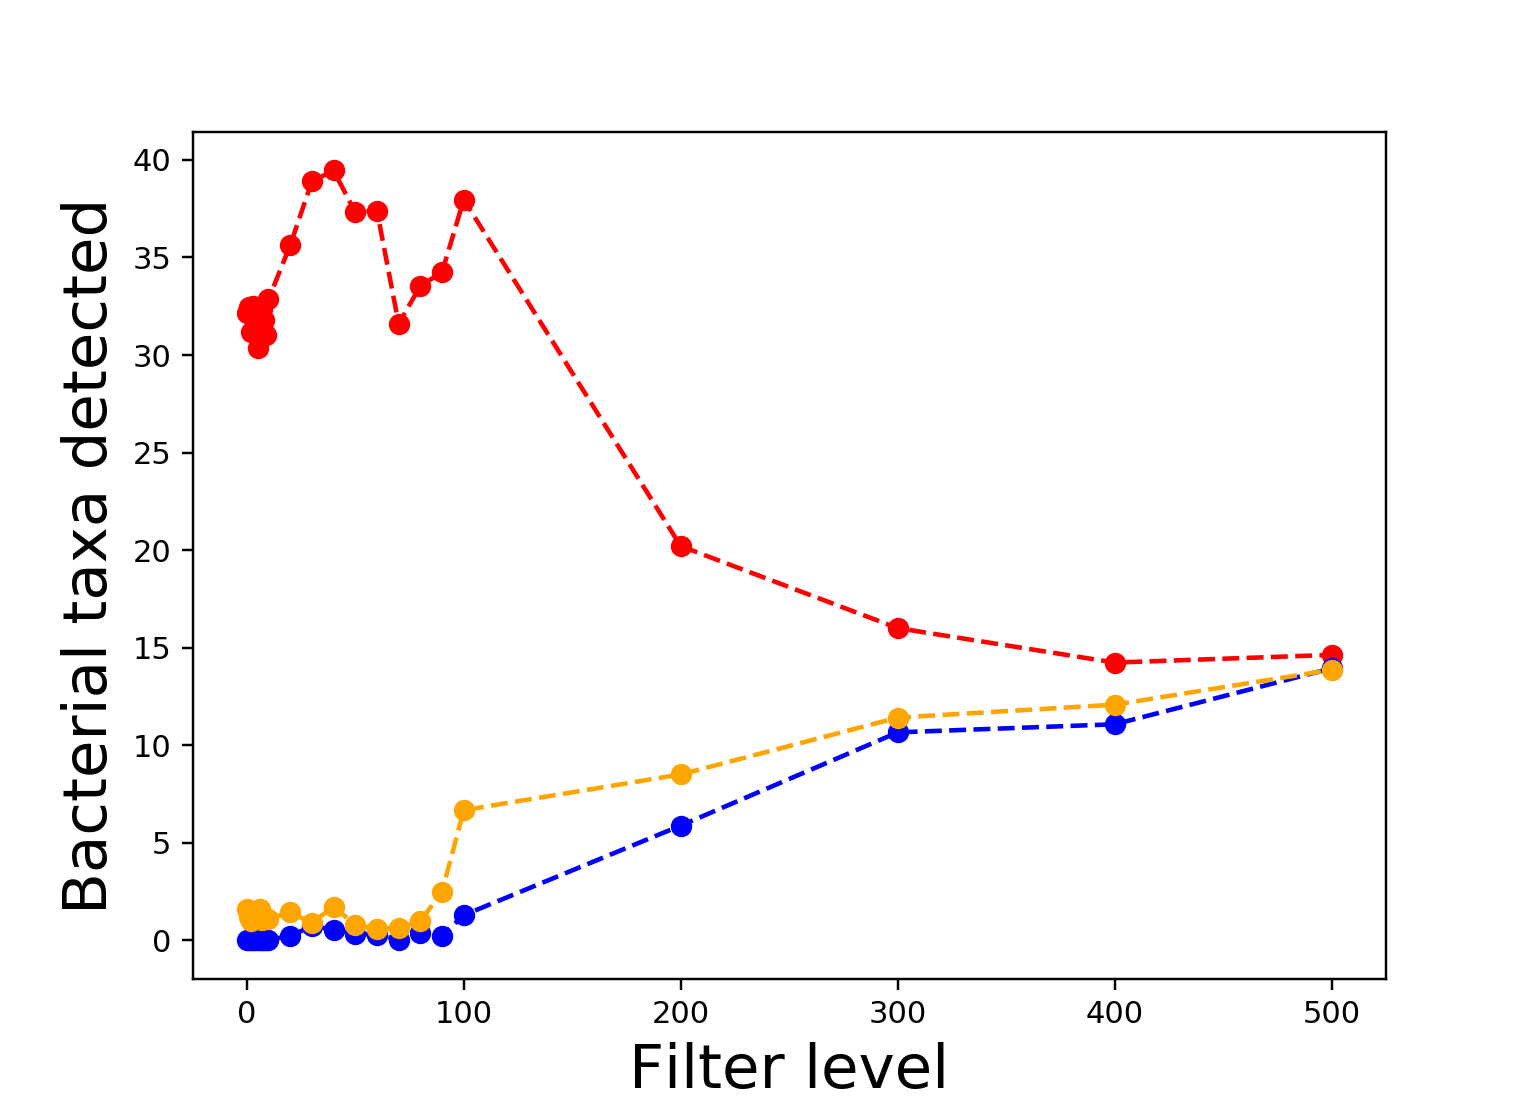

In [12]:
fl_mlt = plt.figure(figsize=(7,5))
plt.plot(filtlev, sig_ds_mlt, linestyle='--', marker='o', color = 'red', label = 'DS')
plt.plot(filtlev, sig_bh_mlt, linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(filtlev, sig_fbh_mlt, linestyle='--', marker='o', color = 'orange', label = 'FBH')

plt.xlabel('Filter level', fontsize = 20)
plt.ylabel('Bacterial taxa detected', fontsize = 20)
fl_mlt.savefig('../figures/fl_mlt.pdf', dpi=300)

<IPython.core.display.Javascript object>


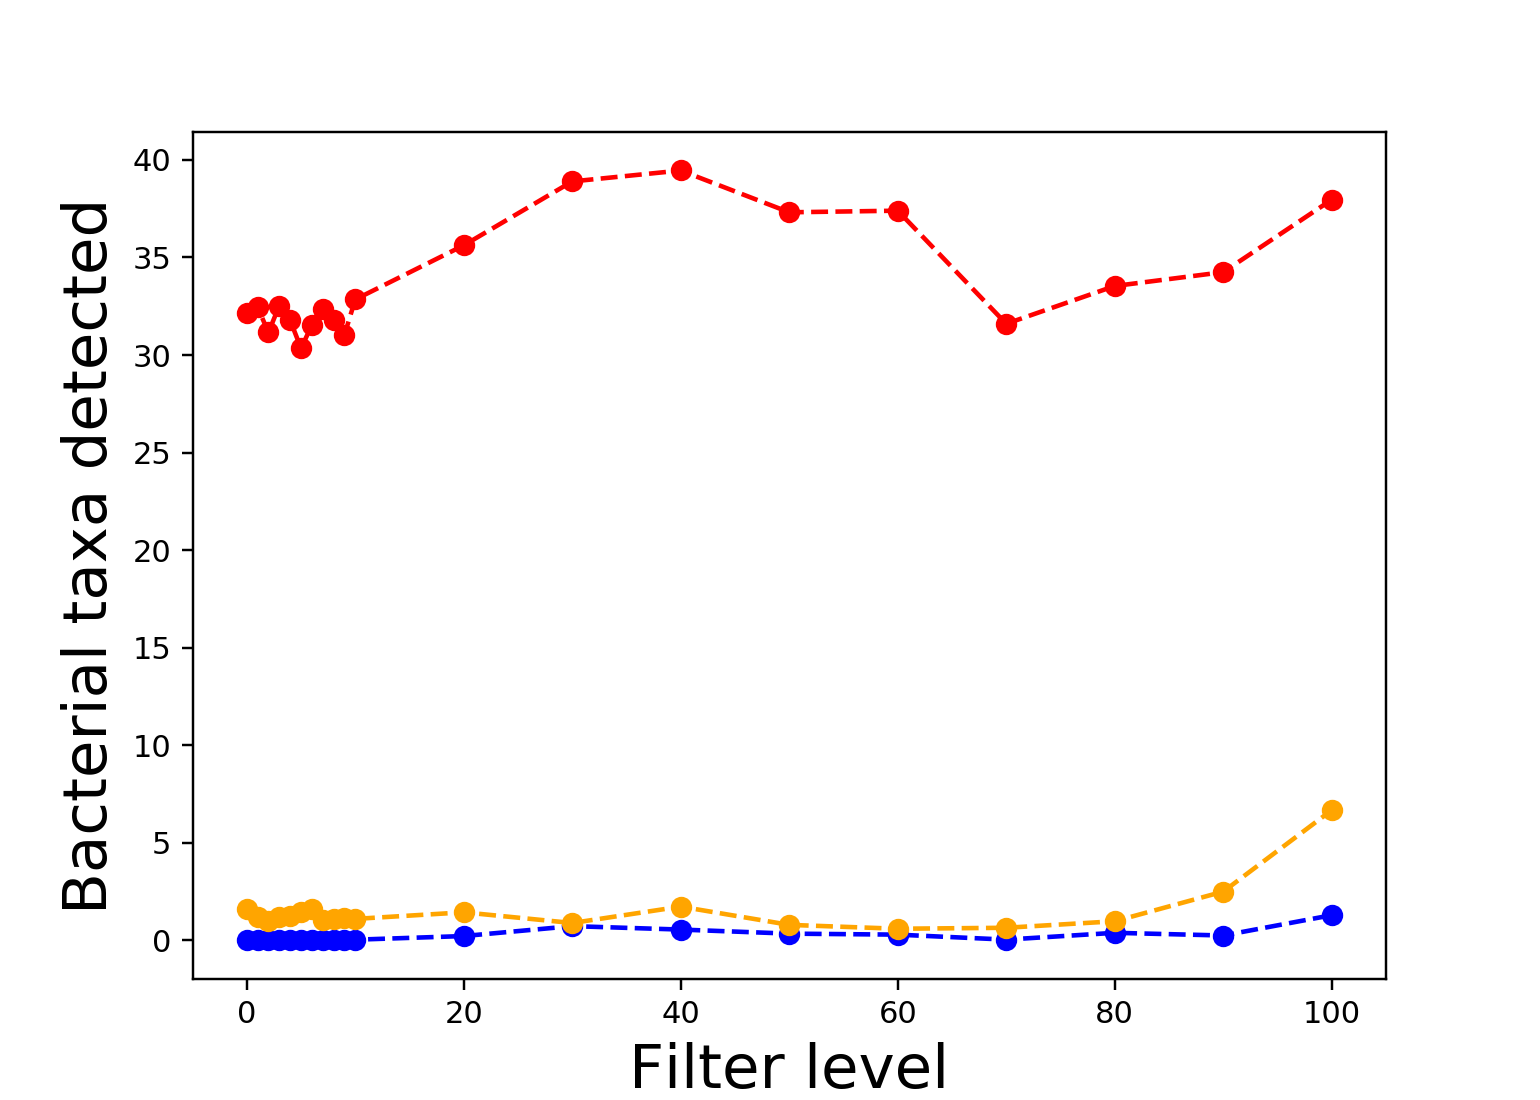

In [13]:
fl_mlt_zoom = plt.figure(figsize=(7, 5))
plt.plot(filtlev[0:20], sig_ds_mlt[0:20], linestyle='--', marker='o', color = 'red', label = 'DS')
plt.plot(filtlev[0:20], sig_bh_mlt[0:20], linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(filtlev[0:20], sig_fbh_mlt[0:20], linestyle='--', marker='o', color = 'orange', label = 'FBH')

plt.xlabel('Filter level', fontsize = 20)
plt.ylabel('Bacterial taxa detected', fontsize = 20)
fl_mlt_zoom.savefig('../figures/fl_mlt_zoom.pdf', dpi=300)

In [18]:
# heatmap

# read in MLT data
mlt = cl.read_amplicon('../../data/mlt.biom','../../data/mlt.map.txt', sparse=False, min_reads=1000, normalize=10000)
mlt_sub1 = mlt.filter_min_abundance(5)

# apply FDR methods to intersted categories
ds1_mlt = mlt_sub1.diff_abundance('Description','mouse cecum, TLR5 knockout','mouse cecum, wild type', fdr_method='dsfdr', numperm=3000)
bh1_mlt = mlt_sub1.diff_abundance('Description','mouse cecum, TLR5 knockout','mouse cecum, wild type', fdr_method='bhfdr', numperm=3000)
fbh1_mlt = mlt_sub1.diff_abundance('Description','mouse cecum, TLR5 knockout','mouse cecum, wild type', fdr_method='filterBH', numperm=3000)

2017-10-14 22:34:34 WARNING no significant features found
2017-10-14 22:34:34 WARNING no significant features found


<IPython.core.display.Javascript object>


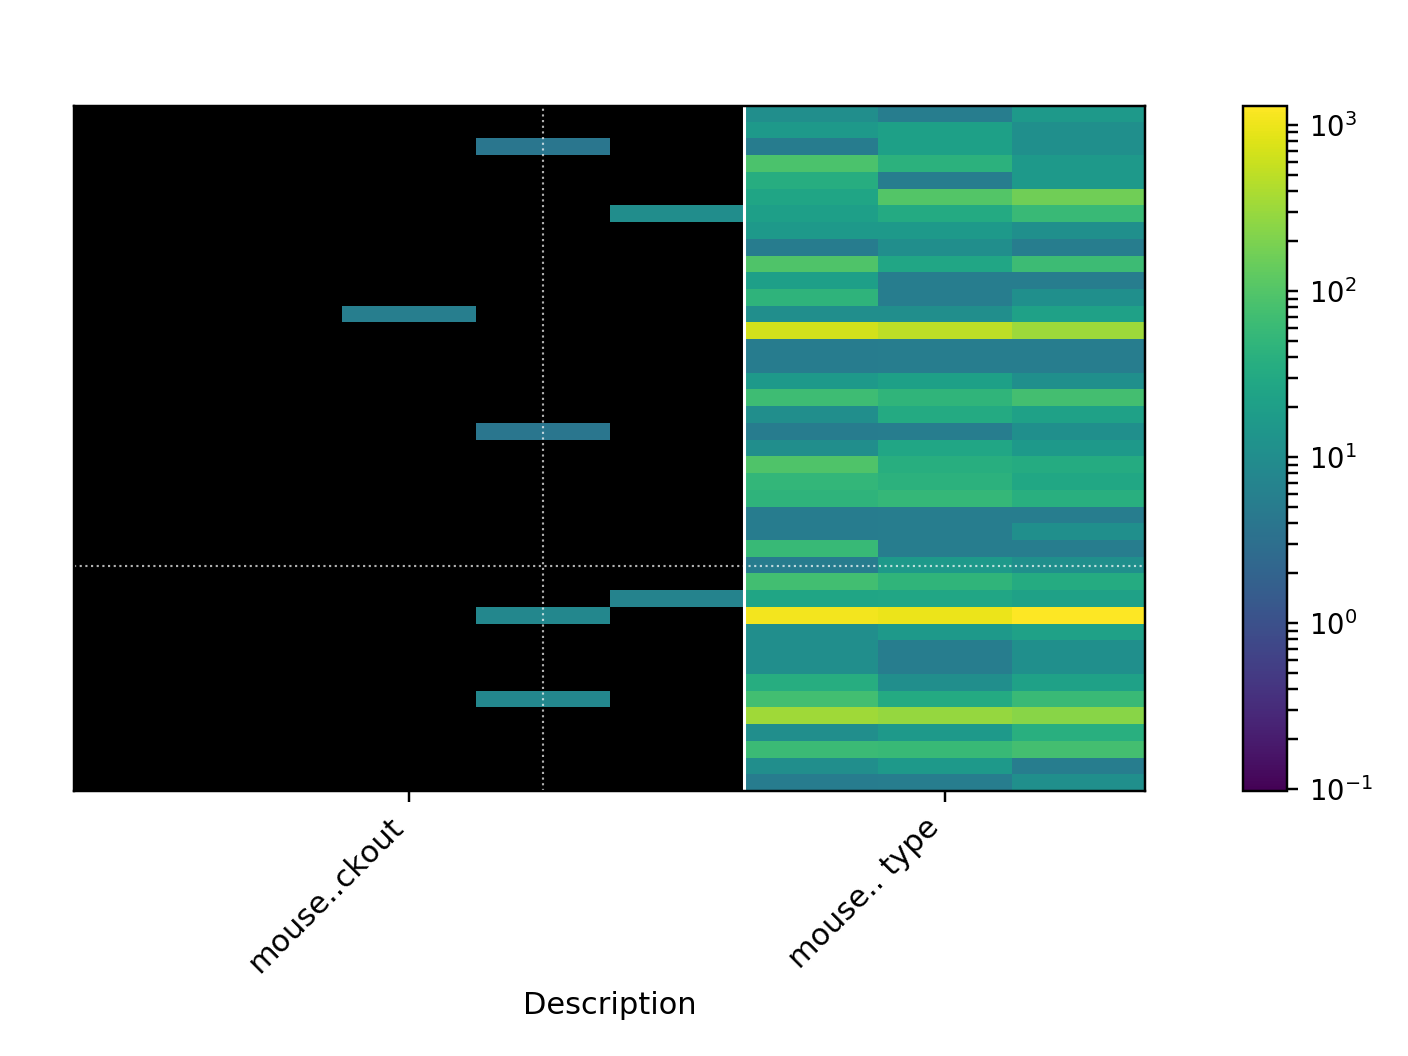

Label(value='0 features are selected')

HBox(children=(Text(value='-', description='Sample ID', layout=Layout(width='100%'), placeholder='Sample ID'), Text(value='-', description='Feature ID', layout=Layout(width='100%'), placeholder='Feature ID'), FloatText(value=0.0, description='Abundance', layout=Layout(width='100%'))))

HBox(children=(Dropdown(layout=Layout(width='20%'), options=('BarcodeSequence', 'LinkerPrimerSequence', 'barcode_read_group_tag', 'dna_extracted_prep', 'experiment_center', 'experiment_design_description', 'experiment_title', 'key_seq', 'library_construction_protocol', 'linker', 'pcr_primers', 'physical_specimen_remaining_prep', 'platform', 'pool_member_name', 'pool_proportion', 'region', 'run_alias', 'run_center', 'run_date', 'run_prefix', 'samp_size', 'sample_center', 'sample_type_prep', 'sequencing_meth', 'study_center', 'study_ref', 'target_gene', 'target_subfragment', 'age', 'age_unit', 'altitude', 'anonymized_name', 'assigned_from_geo', 'body_habitat', 'body_product', 'body_site', 'collection_date', 'common_name', 'country', 'depth', 'dna_extracted', 'elevation', 'env_biome', 'env_feature', 'env_matter', 'host_common_name', 'host_subject_id', 'host_taxid', 'latitude', 'longitude', 'physical_specimen_remaining', 'project_name', 'public', 'sample_type', 'taxon_id', 'title', 'Description', '_calour_original_abundance'), value='BarcodeSequence'), Text(value='-', layout=Layout(width='80%'), placeholder='sample meta')))

HBox(children=(Dropdown(layout=Layout(width='20%'), options=('taxonomy', '_calour_diff_abundance_effect', '_calour_diff_abundance_pval'), value='taxonomy'), Text(value='-', layout=Layout(width='80%'), placeholder='feature meta')))

HBox(children=(Button(description='print axes ranges', style=ButtonStyle()), Button(description='Save', style=ButtonStyle()), Button(description='Annotate', style=ButtonStyle())))

HTML(value='no annotation found', layout=Layout(height='100px', overflow_y='auto'))

In [19]:
# heatmap of all significant OTUs discovered by DS-FDR
ds1_mlt.plot_sort('Description', databases=[], feature_field=None, gui='jupyter') 
plt.savefig('../figures/fl_mlt_heatmap.pdf', bbox_to_inches='tight', dpi=300)